In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")




In [3]:
df = pd.read_csv('Qualitative_Bankruptcy.data.csv')
df = pd.get_dummies(df, columns=["Industrial Risk","Management Risk","Financial Flexibility","Credibility","Competitiveness","Operating Risk"])
df['Class'] = df['Class'].map({'NB': 0, 'B': 1})

cols = df.columns.tolist()
cols.remove('Class')
cols.append('Class')

df = df[cols]
df


,Industrial Risk_A,Industrial Risk_N,Industrial Risk_P,Management Risk_A,Management Risk_N,Management Risk_P,Financial Flexibility_A,Financial Flexibility_N,Financial Flexibility_P,Credibility_A,Credibility_N,Credibility_P,Competitiveness_A,Competitiveness_N,Competitiveness_P,Operating Risk_A,Operating Risk_N,Operating Risk_P,Class
0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0
1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0
2,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
4,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1
246,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1
247,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1
248,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1


In [4]:
def check_clean_data(df):
    print(df.isnull().sum()) #check for null values
    print("\n(Rows, Columns)", df.shape) #check for missing values

    print("\nCheck for empty values")
    print(df[df.eq("?").any(1)]) #check for missing values
check_clean_data(df)

Industrial Risk_A          0
Industrial Risk_N          0
Industrial Risk_P          0
Management Risk_A          0
Management Risk_N          0
Management Risk_P          0
Financial Flexibility_A    0
Financial Flexibility_N    0
Financial Flexibility_P    0
Credibility_A              0
Credibility_N              0
Credibility_P              0
Competitiveness_A          0
Competitiveness_N          0
Competitiveness_P          0
Operating Risk_A           0
Operating Risk_N           0
Operating Risk_P           0
Class                      0
dtype: int64

(Rows, Columns) (250, 19)

Check for empty values
Empty DataFrame
Columns: [Industrial Risk_A, Industrial Risk_N, Industrial Risk_P, Management Risk_A, Management Risk_N, Management Risk_P, Financial Flexibility_A, Financial Flexibility_N, Financial Flexibility_P, Credibility_A, Credibility_N, Credibility_P, Competitiveness_A, Competitiveness_N, Competitiveness_P, Operating Risk_A, Operating Risk_N, Operating Risk_P, Class]
Index: 

In [5]:
def standardize_data(df):
    feature_cols = [col for col in df.columns if col not in ['Class']]
    for col in feature_cols:
        df[col] = (df[col] - df[col].mean())/df[col].std()
    return df
df = standardize_data(df)
print(df)

     Industrial Risk_A  Industrial Risk_N  Industrial Risk_P  \
0            -0.690922          -0.742013           1.454820   
1            -0.690922           1.342294          -0.684621   
2             1.441553          -0.742013          -0.684621   
3            -0.690922          -0.742013           1.454820   
4            -0.690922           1.342294          -0.684621   
..                 ...                ...                ...   
245          -0.690922           1.342294          -0.684621   
246          -0.690922          -0.742013           1.454820   
247           1.441553          -0.742013          -0.684621   
248          -0.690922           1.342294          -0.684621   
249          -0.690922          -0.742013           1.454820   

     Management Risk_A  Management Risk_N  Management Risk_P  \
0            -0.616190          -0.951190           1.737852   
1            -0.616190           1.047109          -0.573121   
2             1.616384          -0.9511

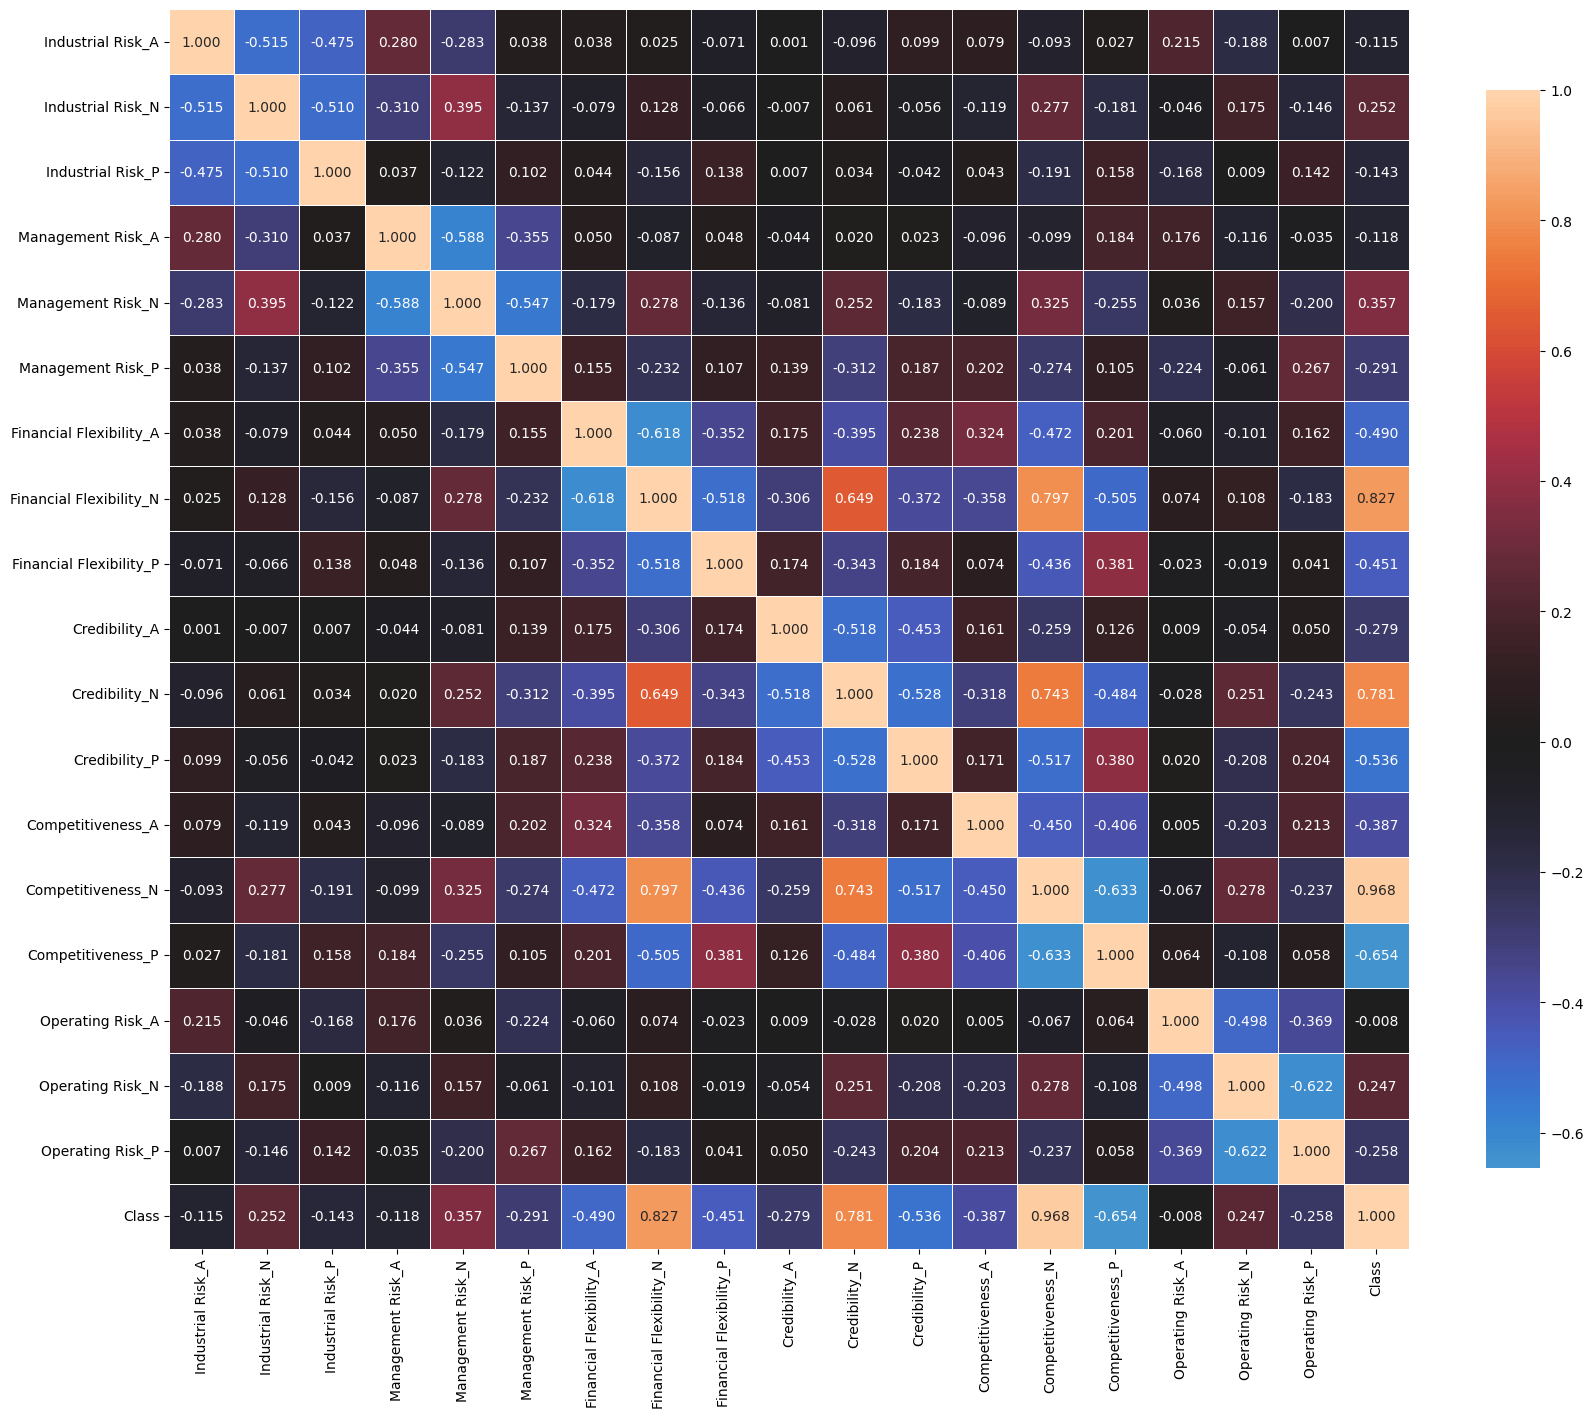

In [6]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.3f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show()
correlation_heatmap(df)

In [7]:
features = df.copy()
features = features.drop(columns=["Class"])
features = features.to_numpy()
print(features, features.shape)

[[-0.69092169 -0.74201338  1.45481958 ... -0.54236099 -0.91371897
   1.4682979 ]
 [-0.69092169  1.34229386 -0.68462098 ... -0.54236099  1.0900507
  -0.67833646]
 [ 1.44155266 -0.74201338 -0.68462098 ...  1.83641527 -0.91371897
  -0.67833646]
 ...
 [ 1.44155266 -0.74201338 -0.68462098 ... -0.54236099  1.0900507
  -0.67833646]
 [-0.69092169  1.34229386 -0.68462098 ... -0.54236099  1.0900507
  -0.67833646]
 [-0.69092169 -0.74201338  1.45481958 ...  1.83641527 -0.91371897
  -0.67833646]] (250, 18)


In [8]:
labels = df[['Class']]
labels = labels.to_numpy()
labels.shape

(250, 1)

In [9]:
logistic = lambda z: 1./ (1 + np.exp(-z))       #logistic function

In [10]:
def gradient(self, x, y):
    N,D = x.shape
    yh = logistic(np.dot(x, self.w))    # predictions  size N
    grad = np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points
    return grad                         # size D

In [11]:
class LogisticRegression:
    
    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients 
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose
        
    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([np.ones(N),x])
        N,D = x.shape
        self.w = np.zeros(D)
        g = np.inf 
        t = 0
        # the code snippet below is for gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y)[:, 0]
            self.w = self.w - self.learning_rate * g 
            t += 1
        
        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self
    
    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([np.ones(Nt),x])
        yh = logistic(np.dot(x,self.w))            #predict output
        return yh

LogisticRegression.gradient = gradient

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.2)
# X_train = np.array(X_train)
# X_test = np.array(X_test)
# y_train = np.array(y_train)
# y_test = np.array(y_test)




In [14]:
def mean_squared_error(matrix1, matrix2):
    # Calculate the difference between the matrices
    difference = matrix1 - matrix2
    # Calculate the squared difference
    squared_difference = difference**2
    # Calculate the mean of the squared difference
    mean_squared_difference = np.mean(squared_difference)
    # Return the mean squared error
    return mean_squared_difference
    
model = LogisticRegression()
training = model.fit(X_train, y_train)
yh_test = training.predict(X_test)
yh_test = yh_test.reshape(-1, 1)
print(mean_squared_error(y_test, yh_test))




0.02


In [ ]:
#First plot
plt.scatter(feat_test[:, :2],label_test, color='blue', label='Actual')
plt.scatter(feat_test[:, :2],exp1_testing, color='red', label='Predicted')

# Add labels and title
plt.xlabel('Data point')
plt.ylabel('Y')
plt.title('Actual vs Predicted Values')
plt.legend()

# Show the plot
plt.show()

#Second plot
plt.subplot(2, 1, 1)
plt.plot(label_test, color='blue', label='Actual')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(exp1_testing, color='red', label='Predicted')
plt.legend()
plt.show()
#TODO: four plots, two for each dependent variable
print("MSE for linear regression, testing set:\n", mse(label_test, exp1_testing))
print("MSE for linear regression, training set:\n", mse(label_train, exp1_train_expected))

print("Report the weights of each of features in your trained models and discuss how each feature could affect the performance of the models.\n")
# print("Weights:\n",weights)
print("Each feature affects the performance of the model in different ways, depending on the magnitude and sign of its weight, as well as the relationship between the feature and the target variable. For example, a feature with a large positive weight will have a strong positive impact on the model's prediction, while a feature with a large negative weight will have a strong negative impact. Features with small weights will have less impact on the model's prediction.\n")
print("W values \n", weights)
print("Importance list for dependent variable Y1:\n")

importance = sorted(zip(range(8), weights[:, 0]), key=lambda x: abs(x[1]), reverse=True)

for feature, weight in importance:
    print(f"Feature X{feature + 1}: {weight}")
print()
print("Importance list for dependent variable Y2:\n")
importance = sorted(zip(range(8), weights[:, 1]), key=lambda x: abs(x[1]), reverse=True)

for feature, weight in importance:
    print(f"Feature X{feature + 1}: {weight}")
print()